# Note for Poisson HMM

In [1]:
using LinearAlgebra
using PyPlot, PyCall
using ArgParse
using Distributions
using JLD

In [2]:
push!(LOAD_PATH, ".")
import PoissonHMM

In [8]:
eye(D::Int) = Matrix{Float64}(I, D, D)

eye (generic function with 1 method)

# Infrence

In [9]:
function test_time_series()
    # Load data
    file_name = "../data/timeseries.jld"
    X = load(file_name)["obs"]

    # Prior
    K = 2
    a = ones(K)
    b = 100.0 * ones(K)
    alpha = 10.0 * ones(K)
    beta = 100.0 * eye(K) + ones(K, K)
    prior = PoissonHMM.PoissonHMMModel(K, a, b, alpha, beta)

    # Inference
    max_iter = 100
    posterior, S_est = PoissonHMM.VI(X, prior, max_iter)

    return posterior, S_est, X
end

test_time_series (generic function with 1 method)

In [10]:
posterior, S_est, X = test_time_series()

(PoissonHMM.PoissonHMMModel(2, [1.0, 92609.0], [100.0, 600.0], [10.0, 11.0], [101.0 1.0; 1.0 600.0]), [0.0 1.0; 0.0 1.0; … ; 0.0 1.0; 0.0 1.0], [167.0, 182.0, 199.0, 181.0, 161.0, 174.0, 157.0, 184.0, 183.0, 173.0  …  189.0, 170.0, 173.0, 180.0, 173.0, 183.0, 185.0, 186.0, 184.0, 204.0])

# Visualize

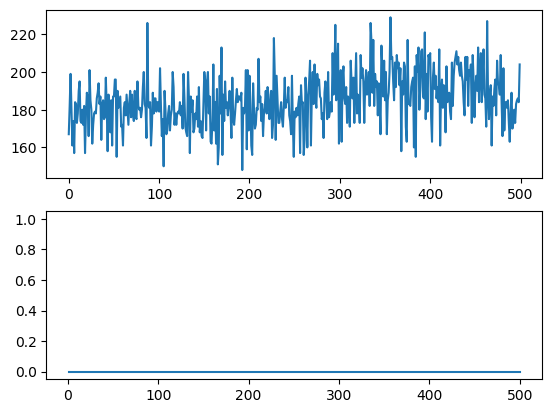

In [21]:
figure("Poisson HMM")
subplot(211)
plot(X)

subplot(212)
plot(1:length(X), S_est[:, 1])
ylim([-0.05, 1.05])
show()